In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

from engine.StockTradeDataEngine import StockTradeDataEngine
from util.chart_methods import draw_line_chart_with_moving_average
from util.chart_methods import draw_time_series_with_mean_and_std

In [2]:
data_engine = StockTradeDataEngine()

In [3]:
df = data_engine.get_trade_data_by_code('600519.sh', date(2020, 1, 20), date(2023, 1, 20))

In [4]:
df.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,1757.119767,1781.688110,1735.492849,1758.906288,1757.766014,1.140274,0.097753,36760.264493,6.420454e+06
std,287.053535,290.673468,281.054169,285.487358,286.450353,36.639685,2.042086,17032.224828,3.026068e+06
min,985.000000,1010.680000,960.100000,996.000000,996.000000,-171.980000,-7.900000,13544.170000,1.854564e+06
25%,1651.375000,1680.217500,1630.197500,1661.000000,1660.850000,-16.960000,-1.007500,25229.450000,4.239432e+06
50%,1787.515000,1809.090000,1766.990000,1790.110000,1789.130000,0.065000,0.005000,32482.800000,5.705459e+06
75%,1950.000000,1970.000000,1931.140000,1949.950000,1949.950000,22.800000,1.320000,43255.042500,7.611579e+06
max,2587.980000,2627.880000,2485.000000,2601.000000,2601.000000,161.000000,9.500000,132098.040000,2.327069e+07


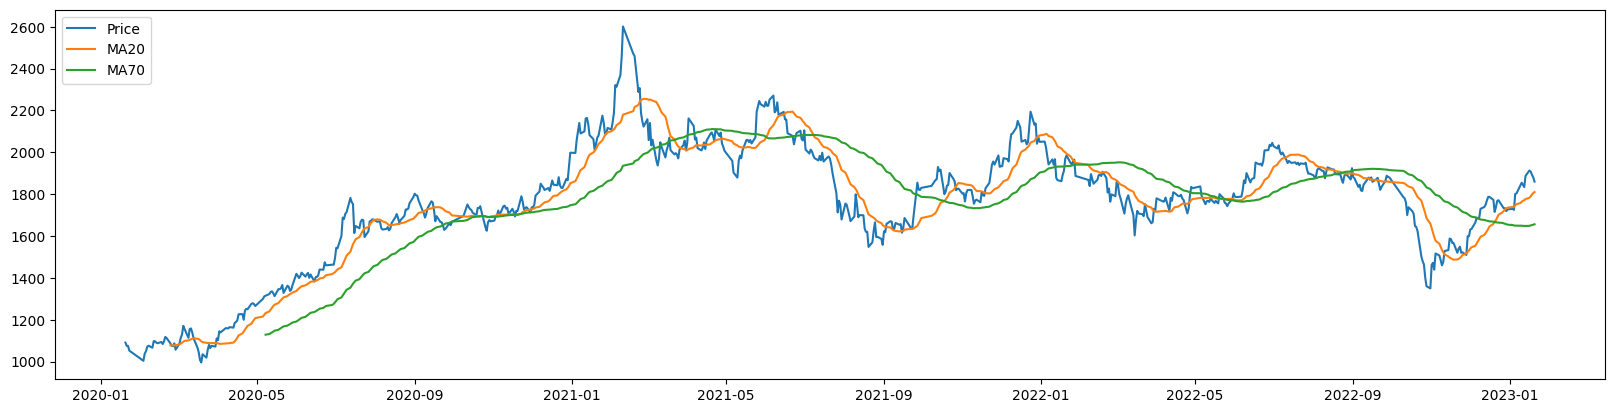

In [5]:
def draw_line_chart_with_moving_average(x_series, y_series, sma_days_list=[5,10,20,30]):
    f = plt.figure()
    f.set_figwidth(20)
    plt.plot(x_series, y_series, label='Price')
    for days in sma_days_list:
        plt.plot(x_series, y_series.rolling(days).mean(), label='MA'+str(days))
    plt.legend(loc="upper left")
    plt.show()
    
draw_line_chart_with_moving_average(x_series=df.trade_date, y_series=df.close, sma_days_list=[20, 70])

In [6]:
y_series = pd.Series(df.pct_chg)
x_series = pd.Series(df.trade_date)

In [7]:
desc = y_series.describe()
desc

count    730.000000
mean       0.097753
std        2.042086
min       -7.900000
25%       -1.007500
50%        0.005000
75%        1.320000
max        9.500000
Name: pct_chg, dtype: float64

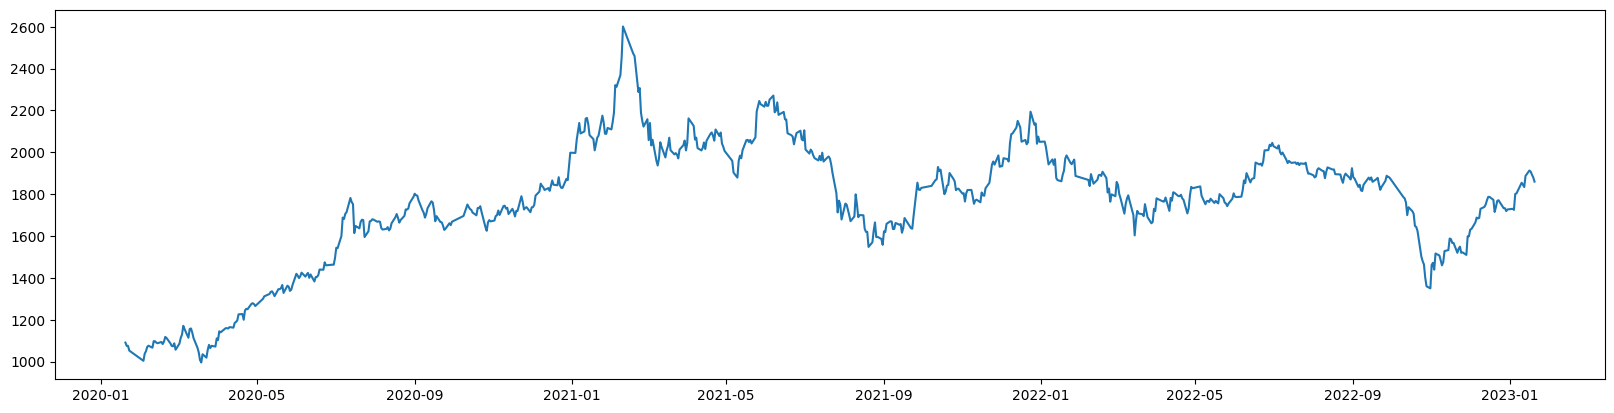

In [8]:
f = plt.figure()
f.set_figwidth(20)
plt.plot(x_series, pd.Series(df.close))
plt.show()

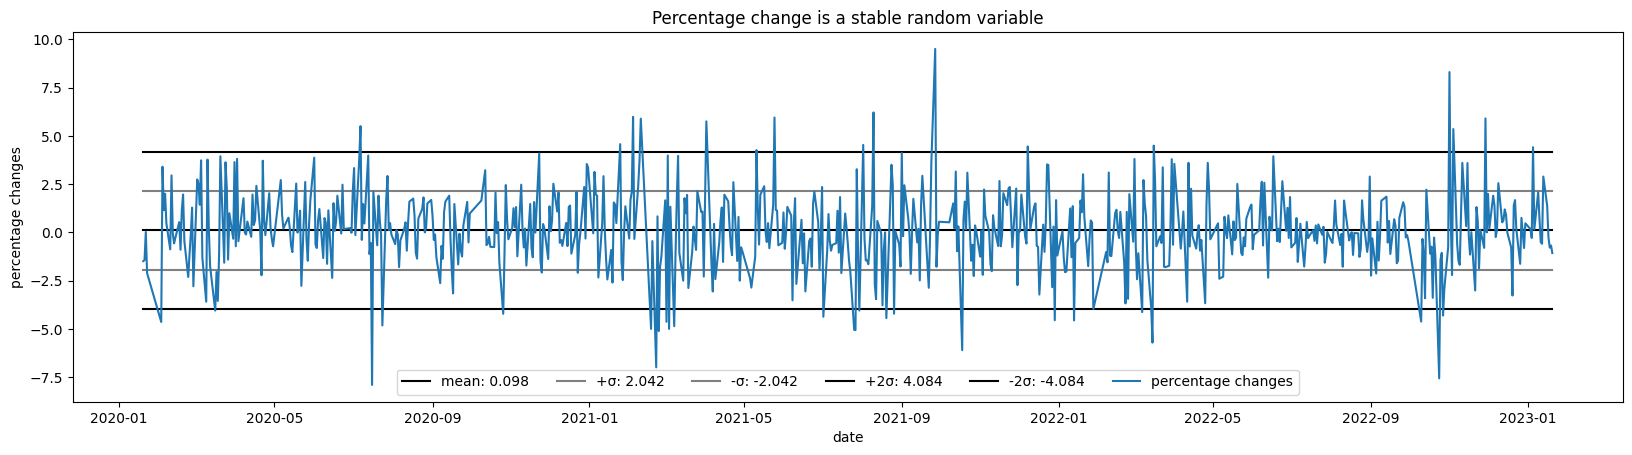

In [24]:
draw_time_series_with_mean_and_std(x_series, y_series, title='Percentage change is a stable random variable', xlabel='date', ylabel='percentage changes')